<a href="https://colab.research.google.com/github/ashwinsathish/DPS_task/blob/main/Acc_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparing data

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("Monthly_accidents.csv")
print(df.iloc[:5, :5])

       MONATSZAHL AUSPRÄGUNG  JAHR   MONAT  WERT
0  Alkoholunfälle  insgesamt  2022  202201   NaN
1  Alkoholunfälle  insgesamt  2022  202202   NaN
2  Alkoholunfälle  insgesamt  2022  202203   NaN
3  Alkoholunfälle  insgesamt  2022  202204   NaN
4  Alkoholunfälle  insgesamt  2022  202205   NaN


In [48]:
# translating column names to English 
df = df.rename(columns={"MONATSZAHL": "Category", "AUSPRÄGUNG": "Accident-Type", "JAHR": "Year", "MONAT": "Month", "WERT": "Value"})

In [49]:
print(df.iloc[:5, :])

         Category Accident-Type  Year   Month  Value  VORJAHRESWERT  \
0  Alkoholunfälle     insgesamt  2022  202201    NaN           16.0   
1  Alkoholunfälle     insgesamt  2022  202202    NaN           14.0   
2  Alkoholunfälle     insgesamt  2022  202203    NaN           24.0   
3  Alkoholunfälle     insgesamt  2022  202204    NaN           16.0   
4  Alkoholunfälle     insgesamt  2022  202205    NaN           24.0   

   VERÄND_VORMONAT_PROZENT  VERÄND_VORJAHRESMONAT_PROZENT  \
0                      NaN                            NaN   
1                      NaN                            NaN   
2                      NaN                            NaN   
3                      NaN                            NaN   
4                      NaN                            NaN   

   ZWÖLF_MONATE_MITTELWERT  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  


In [50]:
# filtering the table to the required no. of columns
new_df = df[["Category", "Accident-Type", "Year", "Month", "Value"]]
new_df.to_csv("Monthly_accidents_filtered.csv", index=False)
print(new_df.iloc[:5, :])

         Category Accident-Type  Year   Month  Value
0  Alkoholunfälle     insgesamt  2022  202201    NaN
1  Alkoholunfälle     insgesamt  2022  202202    NaN
2  Alkoholunfälle     insgesamt  2022  202203    NaN
3  Alkoholunfälle     insgesamt  2022  202204    NaN
4  Alkoholunfälle     insgesamt  2022  202205    NaN


In [51]:
new_df1 = new_df.dropna()
new_df1.head()

,Category,Accident-Type,Year,Month,Value
12,Alkoholunfälle,insgesamt,2021,Summe,383.0
13,Alkoholunfälle,insgesamt,2021,202101,16.0
14,Alkoholunfälle,insgesamt,2021,202102,14.0
15,Alkoholunfälle,insgesamt,2021,202103,24.0
16,Alkoholunfälle,insgesamt,2021,202104,16.0


In [52]:
# dropping records of accidents after 2020
new_df1.drop(new_df1[new_df1["Year"] > 2020].index, inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [53]:
new_df1.head()

,Category,Accident-Type,Year,Month,Value
25,Alkoholunfälle,insgesamt,2020,Summe,430.0
26,Alkoholunfälle,insgesamt,2020,202001,28.0
27,Alkoholunfälle,insgesamt,2020,202002,40.0
28,Alkoholunfälle,insgesamt,2020,202003,27.0
29,Alkoholunfälle,insgesamt,2020,202004,26.0


In [54]:
# dropping columns that contain aggregate values for a year
df2 = new_df1[~new_df1["Month"].str.contains("Summe")]
df2

,Category,Accident-Type,Year,Month,Value
26,Alkoholunfälle,insgesamt,2020,202001,28.0
27,Alkoholunfälle,insgesamt,2020,202002,40.0
28,Alkoholunfälle,insgesamt,2020,202003,27.0
29,Alkoholunfälle,insgesamt,2020,202004,26.0
30,Alkoholunfälle,insgesamt,2020,202005,40.0
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [55]:
df2.loc[df2["Month"].str.isnumeric(), "Month"] = df2.loc[df2["Month"].str.isnumeric(), "Month"].astype(str).str[-2:]
df2

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Category,Accident-Type,Year,Month,Value
26,Alkoholunfälle,insgesamt,2020,01,28.0
27,Alkoholunfälle,insgesamt,2020,02,40.0
28,Alkoholunfälle,insgesamt,2020,03,27.0
29,Alkoholunfälle,insgesamt,2020,04,26.0
30,Alkoholunfälle,insgesamt,2020,05,40.0
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,08,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,09,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,10,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,11,578.0


In [56]:
print(df2["Month"].dtypes)

object


In [57]:
df2['Month'] = df2['Month'].astype(int)
df2

<ipython-input-57-f1b50d7b9a0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = df2['Month'].astype(int)


,Category,Accident-Type,Year,Month,Value
26,Alkoholunfälle,insgesamt,2020,1,28.0
27,Alkoholunfälle,insgesamt,2020,2,40.0
28,Alkoholunfälle,insgesamt,2020,3,27.0
29,Alkoholunfälle,insgesamt,2020,4,26.0
30,Alkoholunfälle,insgesamt,2020,5,40.0
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,8,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,9,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,10,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,11,578.0


In [58]:
df2['Date'] = pd.to_datetime(df2['Year'].astype(str) + df2['Month'].astype(str), format='%Y%m')
df2

<ipython-input-58-19d5d463617a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date'] = pd.to_datetime(df2['Year'].astype(str) + df2['Month'].astype(str), format='%Y%m')


,Category,Accident-Type,Year,Month,Value,Date
26,Alkoholunfälle,insgesamt,2020,1,28.0,2020-01-01
27,Alkoholunfälle,insgesamt,2020,2,40.0,2020-02-01
28,Alkoholunfälle,insgesamt,2020,3,27.0,2020-03-01
29,Alkoholunfälle,insgesamt,2020,4,26.0,2020-04-01
30,Alkoholunfälle,insgesamt,2020,5,40.0,2020-05-01
...,...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,8,647.0,2000-08-01
2082,Verkehrsunfälle,Verletzte und Getötete,2000,9,675.0,2000-09-01
2083,Verkehrsunfälle,Verletzte und Getötete,2000,10,615.0,2000-10-01
2084,Verkehrsunfälle,Verletzte und Getötete,2000,11,578.0,2000-11-01


## Visulaizing data

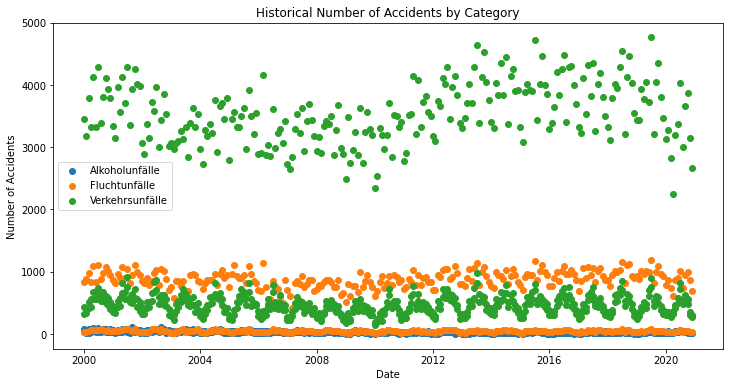

In [59]:
groups = df2.groupby('Category')

plt.figure(figsize=(12, 6))

# creating a scatter plot for each group
for name, group in groups:
    plt.scatter(group['Date'], group['Value'], label=name)

plt.title("Historical Number of Accidents by Category")
plt.xlabel("Date")
plt.ylabel("Number of Accidents")
plt.legend()
plt.show()

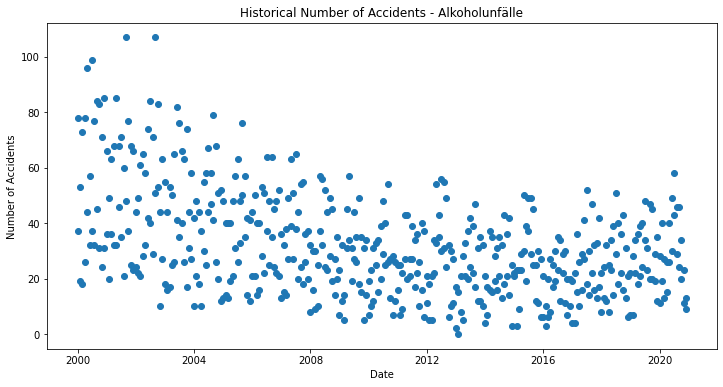

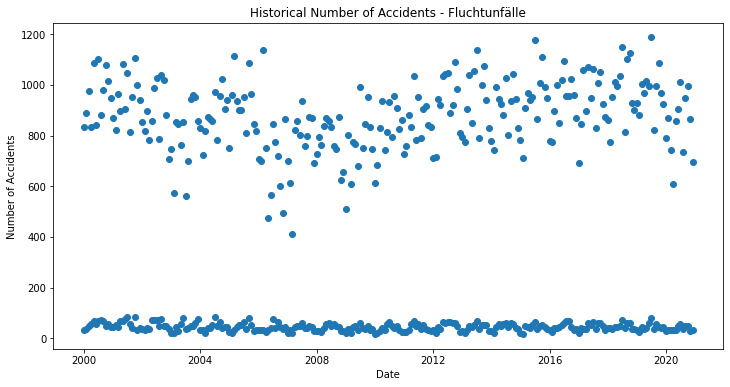

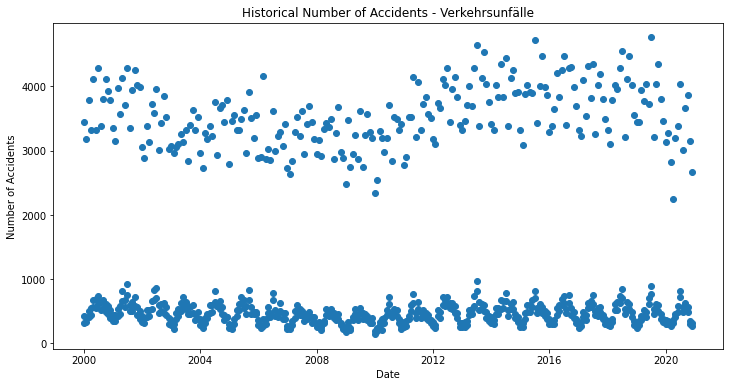

In [61]:
groups2 = df2.groupby('Category')

# creating a scatter plot for each group
for name, group in groups2:
    plt.figure(figsize=(12, 6))  # new figure for each group
    plt.scatter(group['Date'], group['Value'])
    plt.title(f"Historical Number of Accidents - {name}")
    plt.xlabel("Date")
    plt.ylabel("Number of Accidents")

plt.show()

In [62]:
# Get unique categories from the dataframe
categories = df2['Category'].unique()

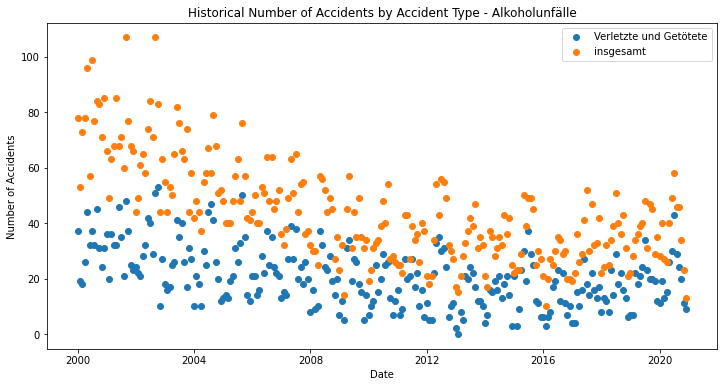

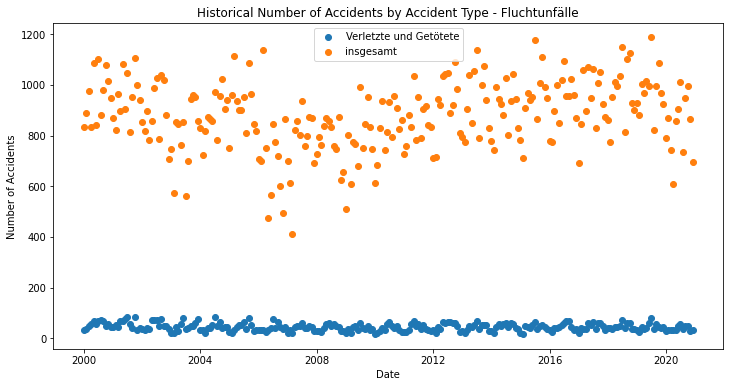

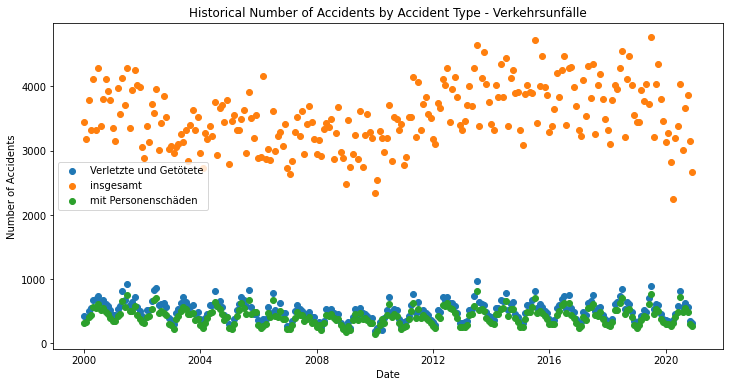

In [64]:
# Iterate over the categories and create a separate plot for each category
for category in categories:
    data = df2[df2['Category'] == category]
    plt.figure(figsize=(12, 6))
    
    # grouping the data by "Accident-Type" column
    groups = data.groupby('Accident-Type')
    
    # scatter plot for each group
    for name, group in groups:
        plt.scatter(group['Date'], group['Value'], label=name)
    
    plt.title(f"Historical Number of Accidents by Accident Type - {category}")
    plt.xlabel("Date")
    plt.ylabel("Number of Accidents")
    plt.legend()
    plt.show()

## XG Boost model

In [65]:
# creating 2 new columns to encode Catgeory and Accident-Type
df2['Category_Code'] = pd.factorize(df2['Category'])[0] + 1
df2['Accident_Type_Code'] = pd.factorize(df2['Accident-Type'])[0] + 1

<ipython-input-65-97779b68cbba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Category_Code'] = pd.factorize(df2['Category'])[0] + 1
<ipython-input-65-97779b68cbba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Accident_Type_Code'] = pd.factorize(df2['Accident-Type'])[0] + 1


In [66]:
df2

,Category,Accident-Type,Year,Month,Value,Date,Category_Code,Accident_Type_Code
26,Alkoholunfälle,insgesamt,2020,1,28.0,2020-01-01,1,1
27,Alkoholunfälle,insgesamt,2020,2,40.0,2020-02-01,1,1
28,Alkoholunfälle,insgesamt,2020,3,27.0,2020-03-01,1,1
29,Alkoholunfälle,insgesamt,2020,4,26.0,2020-04-01,1,1
30,Alkoholunfälle,insgesamt,2020,5,40.0,2020-05-01,1,1
...,...,...,...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,8,647.0,2000-08-01,3,2
2082,Verkehrsunfälle,Verletzte und Getötete,2000,9,675.0,2000-09-01,3,2
2083,Verkehrsunfälle,Verletzte und Getötete,2000,10,615.0,2000-10-01,3,2
2084,Verkehrsunfälle,Verletzte und Getötete,2000,11,578.0,2000-11-01,3,2


In [67]:
# Counting the number of unique category and accident-type codes
category_counts = df2.groupby(['Category_Code'])['Category'].nunique()
accident_type_counts = df2.groupby(['Accident_Type_Code'])['Accident-Type'].nunique()

print("Number of unique category codes:", len(category_counts))
print(category_counts)

print("Number of unique accident-type codes:", len(accident_type_counts))
print(accident_type_counts)

Number of unique category codes: 3
Category_Code
1    1
2    1
3    1
Name: Category, dtype: int64
Number of unique accident-type codes: 3
Accident_Type_Code
1    1
2    1
3    1
Name: Accident-Type, dtype: int64


In [68]:
# grouping by Category_Code and Accident_Type_Code and aggregate the corresponding strings
category_map = df2.groupby('Category_Code').agg({'Category': 'first'})
accident_map = df2.groupby('Accident_Type_Code').agg({'Accident-Type': 'first'})

print("Category Mappings:")
print(category_map)

print("\nAccident-Type Mappings:")
print(accident_map)

Category Mappings:
                      Category
Category_Code                 
1               Alkoholunfälle
2                Fluchtunfälle
3              Verkehrsunfälle

Accident-Type Mappings:
                             Accident-Type
Accident_Type_Code                        
1                                insgesamt
2                   Verletzte und Getötete
3                      mit Personenschäden
